# **ANÁLISE DE LOJAS, CLIENTES E VENDAS**

**OBJETIVOS**

- Verificar as vendas dos ultimos anos

- Analisar as vendas por loja, por produto e cliente

- Selecionar os clientes que mais gastam

- Identificar padrões e tendências

- Identificar problemas e procurar possíveis soluções para tais problemas

#Análise Preliminar

In [1]:
# Biblioteca para evitar erros ao usar Excel
!pip install xlrd

In [2]:
# Biblioteca para gerar gráficos
!pip install matplotlib

In [3]:
# Outras bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importação dos dados
dfClientes = pd.read_excel('/content/drive/MyDrive/trabalhos/python/lojas_informatica/dados/caso_estudo.xlsx', sheet_name='clientes')
dfLojas = pd.read_excel('/content/drive/MyDrive/trabalhos/python/lojas_informatica/dados/caso_estudo.xlsx', sheet_name='lojas')
dfProdutos = pd.read_excel('/content/drive/MyDrive/trabalhos/python/lojas_informatica/dados/caso_estudo.xlsx', sheet_name='produtos')
dfVendas = pd.read_excel('/content/drive/MyDrive/trabalhos/python/lojas_informatica/dados/caso_estudo.xlsx', sheet_name='vendas')
dfPagamentos = pd.read_excel('/content/drive/MyDrive/trabalhos/python/lojas_informatica/dados/caso_estudo.xlsx', sheet_name='pagamentos')

## dfClientes

In [5]:
dfClientes.head()

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953


In [6]:
dfClientes.shape

(1000, 4)

**Dados duplicados**

In [7]:
# Linhas duplicadas
dfClientes.duplicated().sum()

0

In [8]:
# id duplicados
dfClientes.id.duplicated().sum()

0

In [9]:
# Nomes duplicados
dfClientes.nome.duplicated().sum()

109

In [10]:
# Ver nomes duplicados
# Como a linha inteira não se repete, é aconselhado manter como está, pois pode não ser um dado duplicado, apenas digitado errado
dfClientes[dfClientes.nome.duplicated()]

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [11]:
# Verifica se alguma linha completa se repete excluindo a coluna id
# Mais uma vez é aconselhado a manter como está, sendo provavel que os 109 nomes duplicados foram erro de digitação
dfClientes.drop('id', axis=1).duplicated().sum()

0

**Dados em NAN**

In [12]:
# Procura por dados em NAN
dfClientes.isnull().sum()

,0
id,0
nome,4
sexo,4
dt_nasc,4


In [13]:
# Mostra onde estão os dados NAN
dfClientes[dfClientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [14]:
# Analise da coluna sexo
dfClientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

In [15]:
dfClientes.sexo.value_counts()

,count
sexo,
M,502
F,494


## dfLojas

In [16]:
dfLojas

,id,cidade
0,1,São Paulo
1,2,Rio de Janeiro
2,3,Curitiba
3,4,Belo Horizonte
4,5,Santa Catarina
5,6,Recife
6,7,Salvador
7,8,Brasília
8,9,Palmas
9,10,Vitória


In [17]:
dfLojas.shape

(10, 2)

## dfProdutos

In [18]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


In [19]:
dfProdutos.shape

(10, 3)

**Outliers**

In [20]:
# Verificar outliers de dfProdutos por causa do valor do produto xxx-231a
dfProdutos['valor'].describe()

,valor
count,1.000000e+01
mean,3.222752e+05
std,1.015119e+06
min,2.000000e+01
25%,2.475000e+02
50%,7.800000e+02
75%,2.100000e+03
max,3.211352e+06


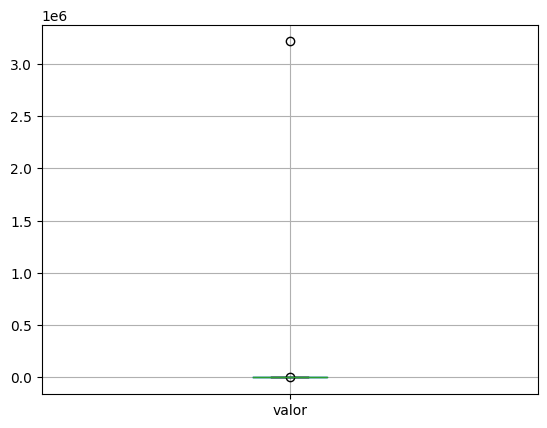

In [21]:
dfProdutos.boxplot(column='valor')
plt.show()

In [22]:
# Localiza a linha do outliers
dfProdutos[dfProdutos.valor > 3000000]

,id,produto,valor
9,10,xxx-231a,3211352.0


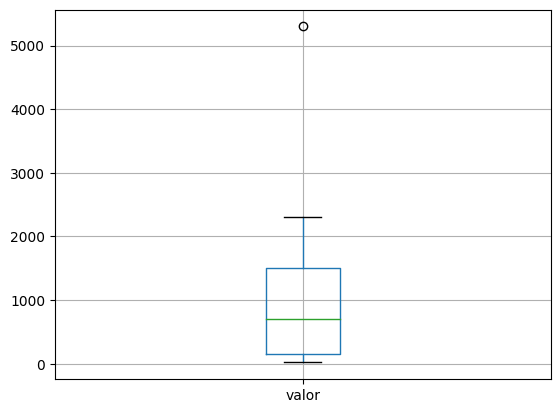

In [23]:
# Boxplot sem o outliers detectado
dfProdutos[dfProdutos.valor < 3000000].boxplot(column='valor')
plt.show()

In [24]:
# Verifica na tabela dfVendas se o produto da linha 9 (nome xxx-231a e id_produto 10) já foi vendido alguma vez
dfVendas[dfVendas.id_produto == 10]

,id,id_cliente,id_loja,id_produto,dt_venda
7,8,543,10,10,2018-01-06
9,10,724,3,10,2018-01-07
20,21,270,2,10,2018-01-12
22,23,665,10,10,2018-01-12
28,29,299,5,10,2018-01-13
...,...,...,...,...,...
2906,2907,907,2,10,2020-08-23
2946,2947,387,3,10,2020-09-10
2956,2957,35,7,10,2020-09-14
2966,2967,405,3,10,2020-09-17


In [25]:
# Total de vendas do produto com id 10
dfVendas[dfVendas.id_produto == 10].count()

,0
id,182
id_cliente,182
id_loja,182
id_produto,182
dt_venda,182


## dfVendas

In [26]:
dfVendas.head()

,id,id_cliente,id_loja,id_produto,dt_venda
0,1,393,9,3,2018-01-04
1,2,417,9,3,2018-01-04
2,3,374,7,8,2018-01-04
3,4,59,4,3,2018-01-05
4,5,18,9,1,2018-01-05


In [27]:
dfVendas.shape

(3000, 5)

**Dados duplicados**

In [28]:
# Linhas duplicadas
dfVendas.duplicated().sum()

0

In [29]:
# Dados duplicados pelo id
dfVendas.id.duplicated().sum()

0

In [30]:
# Verifica se alguma linha completa se repete excluindo a coluna id
dfVendas.drop('id', axis=1).duplicated().sum()

1

In [31]:
# Verifica a linha duplicada
dfVendas[dfVendas.drop('id', axis=1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


In [32]:
# Filtra os dados duplicados pelo id do cliente, pelo id da loja, e pelo id do produto
# Pelas vendas possuirem id diferente, talvez tenha sido um cliente fazendo a compra do mesmo produto novamente no mesmo dia
dfVendas[(dfVendas.id_cliente == 559) & (dfVendas.id_loja == 2) & (dfVendas.id_produto == 5)]

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


**Dados em NAN**

In [33]:
dfVendas.isnull().sum()

,0
id,0
id_cliente,0
id_loja,0
id_produto,0
dt_venda,0


## dfPagamentos

In [34]:
dfPagamentos.head()

,id,id_venda,dt_pgto
0,1,1,2018-01-24
1,2,2,2018-02-17
2,3,3,2018-02-14
3,4,5,2018-01-23
4,5,7,2018-02-15


In [35]:
dfPagamentos.shape

(2072, 3)

**Dados duplicados**

In [36]:
# Linhas duplicadas
dfPagamentos.duplicated().sum()

0

In [37]:
# Dados duplicados pelo id
dfPagamentos.id.duplicated().sum()

0

In [38]:
# Dados duplicados pelo id da venda
dfPagamentos.id_venda.duplicated().sum()

0

**Dados em NAN**

In [39]:
dfPagamentos.isnull().sum()

,0
id,0
id_venda,0
dt_pgto,0


# Data Cleanning

## dfClientes

**Dados em NAN**

In [40]:
# Procura por dados em NAN
dfClientes.isnull().sum()

,0
id,0
nome,4
sexo,4
dt_nasc,4


In [41]:
dfClientes[dfClientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [42]:
# Modificando os sexos em NAN
dfClientes.loc[dfClientes['nome'] == 'Victor Ribeiro', 'sexo'] = 'M'
dfClientes.loc[dfClientes['nome'] == 'Clara Pinto', 'sexo'] = 'F'
dfClientes.loc[dfClientes['nome'] == 'Tiago Lima', 'sexo'] = 'M'
dfClientes.loc[dfClientes['nome'] == 'Guilherme Cardoso', 'sexo'] = 'M'

In [43]:
# Modifica os outros dados em NAN
dfClientes.loc[dfClientes.nome.isnull(), 'nome'] = 'Desconhecido'
dfClientes.loc[dfClientes.dt_nasc.isnull(), 'dt_nasc'] = '01/1/2024'

In [44]:
# Confere se ainda existem dados em NAN
dfClientes.isnull().sum()

,0
id,0
nome,0
sexo,0
dt_nasc,0


**Formato das datas**

In [45]:
# Corrigir o formato das datas
dfClientes.dt_nasc = pd.to_datetime(dfClientes.dt_nasc, format='%m/%d/%Y')

In [46]:
# Conferindo
dfClientes.head()

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06


## dfLojas

In [47]:
# Tudo ok com dfLojas
dfLojas

,id,cidade
0,1,São Paulo
1,2,Rio de Janeiro
2,3,Curitiba
3,4,Belo Horizonte
4,5,Santa Catarina
5,6,Recife
6,7,Salvador
7,8,Brasília
8,9,Palmas
9,10,Vitória


## dfProdutos

In [48]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


In [49]:
# Visualiza o produto que está com valor muito acima do padrão
dfProdutos[dfProdutos.valor > 3000000]

,id,produto,valor
9,10,xxx-231a,3211352.0


In [50]:
# Dividir o produto da linha 9 por 10.000 para que o valor do produto fique o mais próxim da realidade
dfProdutos.loc[9, 'valor'] = dfProdutos.loc[9, 'valor'] / 10000

In [51]:
# Conferir o valor do produto através de seu id
dfProdutos.loc[dfProdutos.id == 10]

,id,produto,valor
9,10,xxx-231a,321.1352


In [52]:
# Conferindo novamente a tabela de produtos, só que agora corrigida
dfProdutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


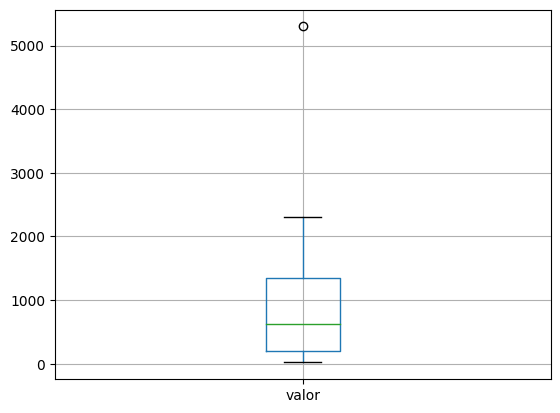

In [53]:
# Boxplot com os valores corrigidos
dfProdutos.boxplot(column='valor')
plt.show()

## dfVendas

In [54]:
# Tudo ok com dfVendas
dfVendas

,id,id_cliente,id_loja,id_produto,dt_venda
0,1,393,9,3,2018-01-04
1,2,417,9,3,2018-01-04
2,3,374,7,8,2018-01-04
3,4,59,4,3,2018-01-05
4,5,18,9,1,2018-01-05
...,...,...,...,...,...
2995,2996,671,3,7,2020-09-27
2996,2997,586,8,3,2020-09-27
2997,2998,731,2,4,2020-09-27
2998,2999,163,2,1,2020-09-27


## dfPagamentos

In [55]:
# Tudo ok com dfPagamentos
dfPagamentos

,id,id_venda,dt_pgto
0,1,1,2018-01-24
1,2,2,2018-02-17
2,3,3,2018-02-14
3,4,5,2018-01-23
4,5,7,2018-02-15
...,...,...,...
2067,2068,2990,2020-10-04
2068,2069,2992,2020-10-10
2069,2070,2994,2020-10-09
2070,2071,2996,2020-10-17


# Consistência entre as tabelas

In [56]:
# Filtra os id_cliente do dataframe dfVendas que não estão dentro do dataframe dfClientes
dfVendas[~dfVendas.id_cliente.isin(dfClientes.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [57]:
# Filtra os id_loja do dataframe dfVendas que não estão dentro do dataframe dfLojas
dfVendas[~dfVendas.id_loja.isin(dfLojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [58]:
# Filtra os id_produto do dataframe dfVendas que não estão dentro do dataframe dfProdutos
dfVendas[~dfVendas.id_produto.isin(dfProdutos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [59]:
# Filtra os id_venda do dataframe dfPagamentos que não estão dentro do dataframe dfVendas
dfPagamentos[~dfPagamentos.id_venda.isin(dfVendas.id)]

,id,id_venda,dt_pgto


In [60]:
# Mostra os id_venda do dataframe dfVendas que não estão dentro do dataframe dfPagamentos
# Ou seja, vendas que não registraram pagamentos
dfVendas[~dfVendas.id.isin(dfPagamentos.id_venda)]

,id,id_cliente,id_loja,id_produto,dt_venda
3,4,59,4,3,2018-01-05
5,6,52,8,3,2018-01-05
20,21,270,2,10,2018-01-12
21,22,465,2,3,2018-01-12
32,33,459,2,7,2018-01-13
...,...,...,...,...,...
2992,2993,764,2,7,2020-09-25
2994,2995,6,2,3,2020-09-27
2997,2998,731,2,4,2020-09-27
2998,2999,163,2,1,2020-09-27


In [61]:
# Visualizar pela quantidade em cada coluna
dfVendas[~dfVendas.id.isin(dfPagamentos.id_venda)].count()

,0
id,928
id_cliente,928
id_loja,928
id_produto,928
dt_venda,928


# Unir id

In [62]:
# A tarefa abaixo cria uma chave primária, que conectará as bases e será a referência de cada linha

In [63]:
# Converter o id de dfClientes para que o id seja o próprio index do dataframe (não existe mais coluna id, o id agora é o index do dataframe)
dfClientes = dfClientes.set_index('id')
dfClientes

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06
...,...,...,...
996,Ágatha Ribeiro,F,1946-02-08
997,Laura Oliveira,F,1979-06-15
998,Lara Oliveira,F,1946-03-15


In [64]:
# Fazer o mesmo com os outros dataframes
dfLojas = dfLojas.set_index('id')
dfProdutos = dfProdutos.set_index('id')
dfVendas = dfVendas.set_index('id')
dfPagamentos = dfPagamentos.set_index('id')

# Unir Tabelas

In [65]:
dfVendas.head()

,id_cliente,id_loja,id_produto,dt_venda
id,,,,
1,393,9,3,2018-01-04
2,417,9,3,2018-01-04
3,374,7,8,2018-01-04
4,59,4,3,2018-01-05
5,18,9,1,2018-01-05


In [66]:
dfClientes.head()

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06


In [67]:
# Juntar as tabelas através da conexão da coluna id_cliente de dataframe principal dfVendas, e do index (id) de dfClientes
# dfVendas é o dataframe principal porque é onde possui a maior quantidade de informações relacionadas aos outros dataframes
dfVendas.join(dfClientes, on = 'id_cliente')

,id_cliente,id_loja,id_produto,dt_venda,nome,sexo,dt_nasc
id,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31
3,374,7,8,2018-01-04,André Alves,M,1962-08-03
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15
...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04


In [68]:
# Adiciona o prefixo cliente_ aos nomes das colunas pertencentes a dfClientes
dfVendas.join(dfClientes.add_prefix('cliente_'), on = 'id_cliente')

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc
id,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31
3,374,7,8,2018-01-04,André Alves,M,1962-08-03
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15
...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04


In [69]:
# Cria um novo dataframe com as alterações de junção e prefixo feitas
df = dfVendas.join(dfClientes.add_prefix('cliente_'), on = 'id_cliente')
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc
id,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31
3,374,7,8,2018-01-04,André Alves,M,1962-08-03
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15
...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04


In [70]:
# Juntar df com os outros dataframes restantes
df = dfVendas.join(dfClientes.add_prefix('cliente_'), on = 'id_cliente')
df = df.join(dfLojas.add_prefix('loja_'), on = 'id_loja')
df = df.join(dfProdutos.add_prefix('produto_'), on = 'id_produto')

In [71]:
# Visualizar as primeiras linhas do dataframe criado
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor
id,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0


In [72]:
# Junta df com dfPagamentos garantindo que id_venda de dfPagamentos será o mesmo index de df
df = df.join(dfPagamentos.set_index('id_venda'))

In [73]:
# Visualizar as primeiras linhas de df
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23


In [74]:
# Conferir se foi gerado algum dado nulo ou em branco na junção dos dataframes
df.isnull().sum()

,0
id_cliente,0
id_loja,0
id_produto,0
dt_venda,0
cliente_nome,0
cliente_sexo,0
cliente_dt_nasc,0
loja_cidade,0
produto_produto,0
produto_valor,0


# Criar Novos Dados

## Criar coluna pg

In [75]:
# Cria a coluna pg (que significa pagamento) e insere 1 em toda coluna
df['pg'] = 1

In [76]:
# Nas linhas em que dt_pgto possui dados nulos (NaT) é inserido 0 nas linhas da coluna pg
df.loc[df.dt_pgto.isnull(), 'pg'] = 0

In [77]:
# Visualizar
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg
id,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1


## Criar coluna tempo_pg

In [78]:
# Verifica o número de dias entre a data da compra e a data de pagamento
df.dt_pgto - df.dt_venda

,0
id,
1,20 days
2,44 days
3,41 days
4,NaT
5,18 days
...,...
2996,20 days
2997,5 days
2998,NaT


In [79]:
# Cria a coluna tempo_pg e armazena nessa coluna o número de dias entre a data da compra e a data de pagamento em números inteiros
df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days

In [80]:
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg
id,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0


## Criar coluna cliente_idade

In [81]:
# Cria coluna cliente_idade e armazena a diferença em anos entre a data de nascimento e a data atual
df['cliente_idade'] = np.floor((pd.to_datetime('today') - df.cliente_dt_nasc)/np.timedelta64(1,'D'))/365.25

In [82]:
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74.737851
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52.665298
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,62.160164
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82.902122
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83.460643


In [83]:
# Convertendo a coluna 'cliente_idade' para inteiro
df['cliente_idade'] = df['cliente_idade'].astype(int)

In [84]:
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,62
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83


# Análise de Vendas e Receitas

## Vendas e receitas por ano

In [85]:
# Criando uma nova coluna contendo o ano da venda
df['venda_ano'] = pd.DatetimeIndex(df.dt_venda).year

In [86]:
# Visualizar a coluna venda_ano
# df['venda_ano']

In [87]:
# Soma da coluna venda_ano
df2 = df.groupby('venda_ano').tempo_pg.sum()
df2

,tempo_pg
venda_ano,
2018,17543.0
2019,16866.0
2020,12153.0


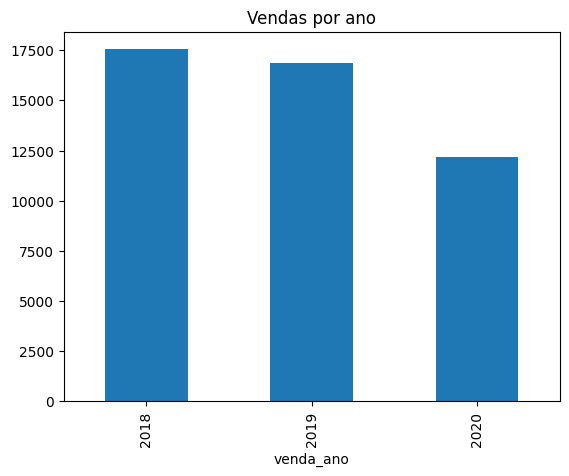

In [88]:
df2.plot.bar()
plt.title('Vendas por ano')
plt.show()

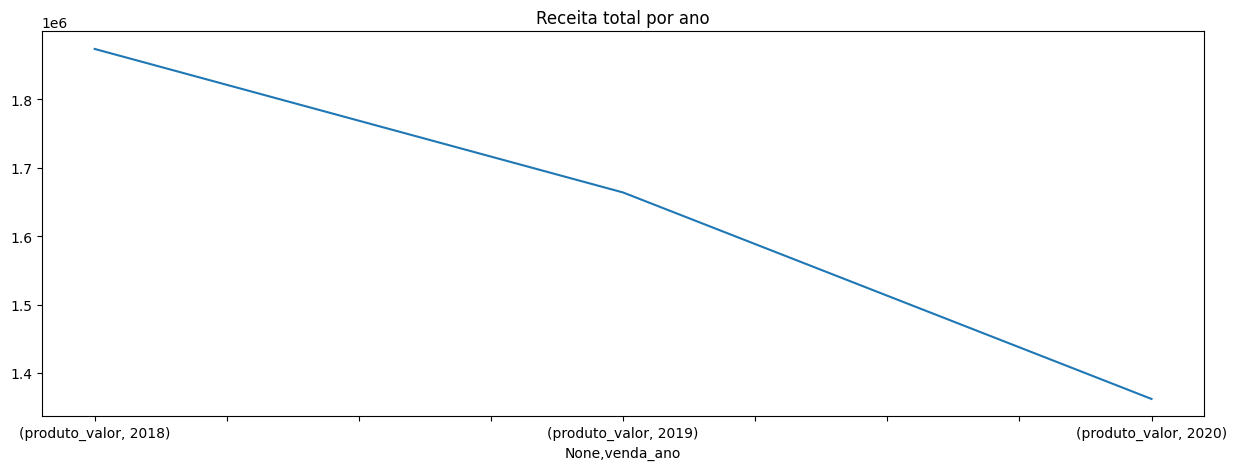

In [89]:
# Receita total por ano
fig, ax = plt.subplots(figsize=(15,5))
receita_total_ano = df[['produto_valor','venda_ano']].groupby(['venda_ano']).sum().unstack().plot(ax=ax)
plt.title('Receita total por ano')
plt.show()

**Média móvel da receita durante os anos de atuação da empresa**

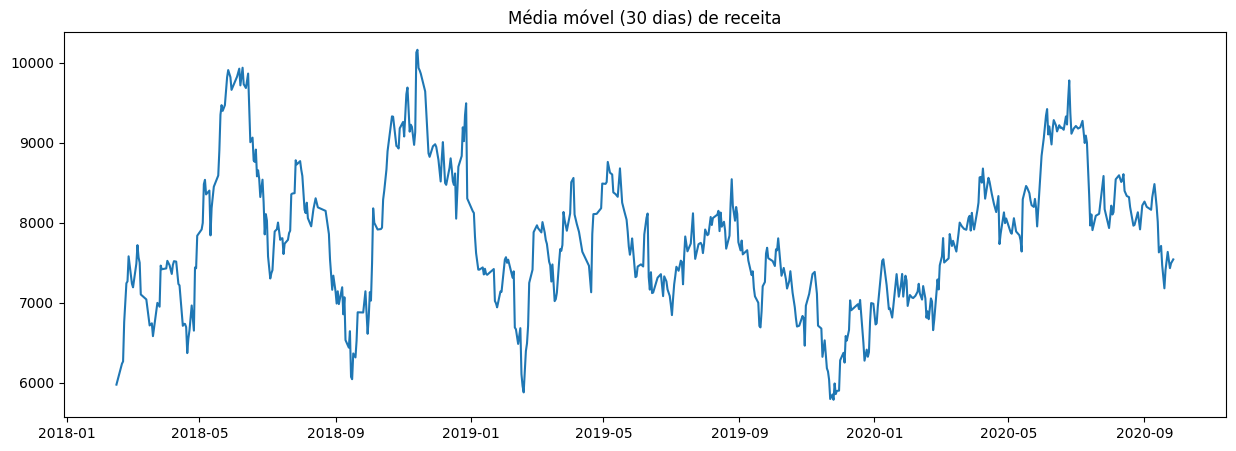

In [90]:
plt.figure(figsize=(15,5))
media_movel = df[['produto_valor','dt_venda']].groupby('dt_venda').sum().rolling(30).mean()
plt.plot(media_movel.index, media_movel.values)
plt.title('Média móvel (30 dias) de receita')
plt.show()

**Receita por produto por ano**

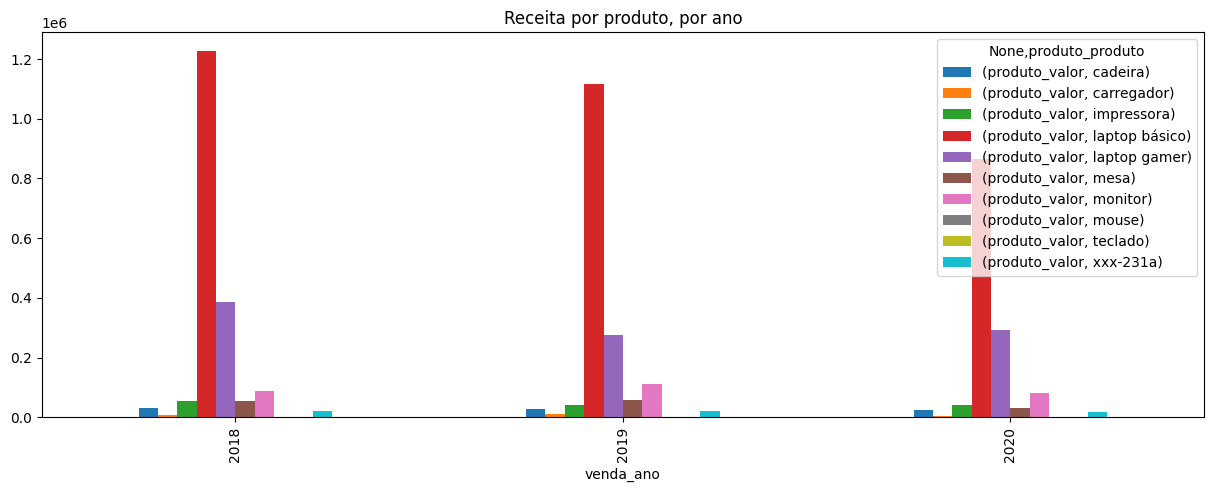

In [91]:
fig, ax = plt.subplots(figsize=(15,5))
receita_produto_ano = df[['produto_valor','produto_produto','venda_ano']].groupby(['venda_ano','produto_produto']).sum().unstack().plot.bar(ax=ax)
plt.title('Receita por produto, por ano')
plt.show()

**Receita por loja(cidade) por ano**

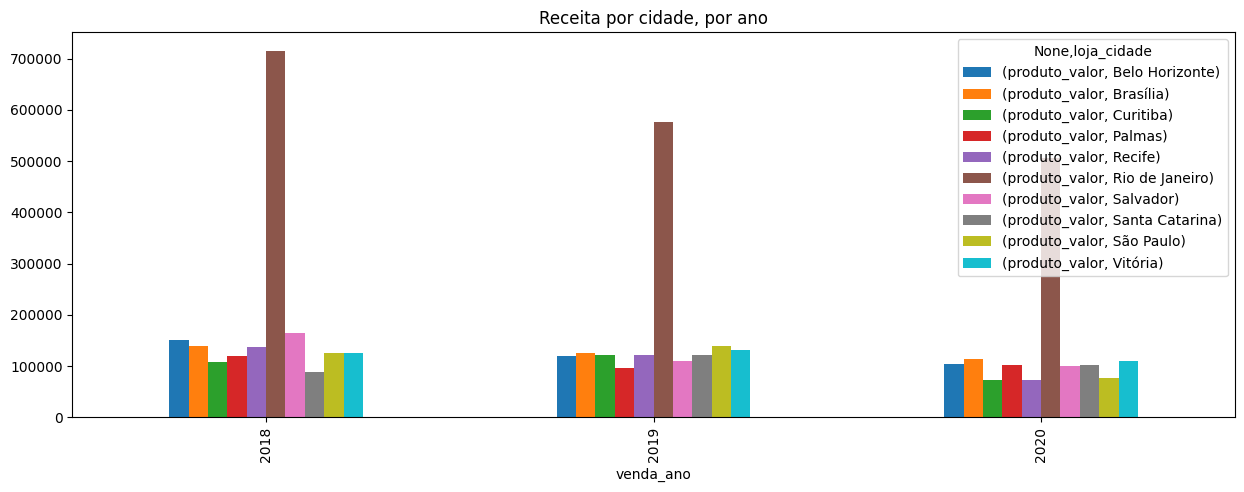

In [92]:
fig, ax = plt.subplots(figsize=(15,5))
df[['produto_valor','loja_cidade','venda_ano']].groupby(['venda_ano','loja_cidade']).sum().unstack().plot.bar(ax=ax)
plt.title('Receita por cidade, por ano')
plt.show()

## Vendas por loja (cidade)

In [93]:
# Mostra o número de vendas por cidade do maior para o menor e armazena em vendas_loja
venda_loja = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
venda_loja

,produto_valor
loja_cidade,
Rio de Janeiro,1087
Salvador,234
Vitória,231
Brasília,223
Belo Horizonte,221
Recife,211
São Paulo,207
Palmas,202
Curitiba,193


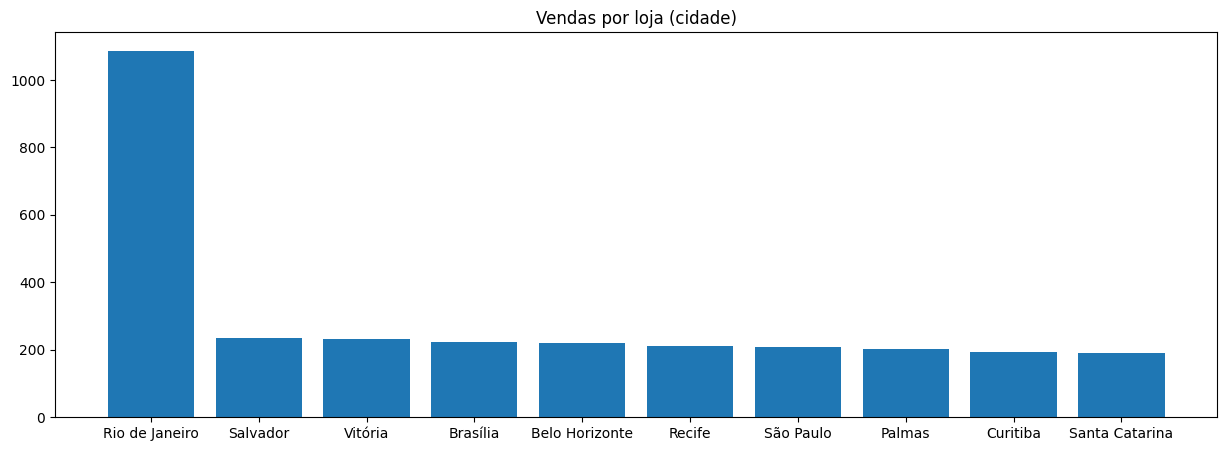

In [94]:
plt.figure(figsize=(15,5))
plt.bar(venda_loja.index, venda_loja.values)
plt.title('Vendas por loja (cidade)')
plt.show()

## Vendas por produto

In [95]:
venda_produto = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
venda_produto

,produto_valor
produto_produto,
laptop básico,1395
teclado,204
impressora,191
monitor,187
xxx-231a,182
laptop gamer,180
mouse,172
mesa,171
carregador,164


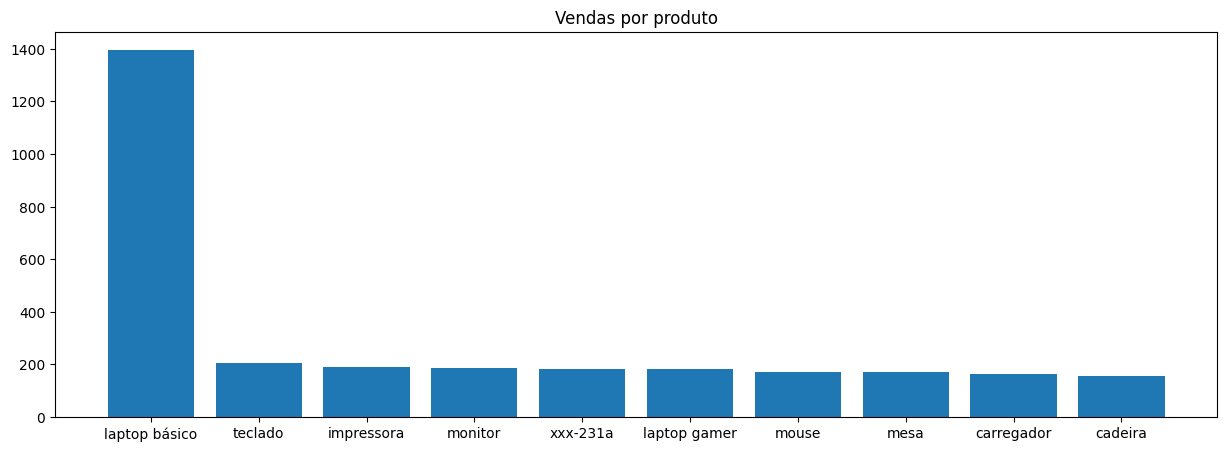

In [96]:
plt.figure(figsize=(15,5))
plt.bar(venda_produto.index, venda_produto.values)
plt.title('Vendas por produto')
plt.show()

## Receita por loja

In [97]:
receita_loja = df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending=False)
receita_loja

,produto_valor
loja_cidade,
Rio de Janeiro,1.797907e+06
Brasília,3.779836e+05
Belo Horizonte,3.757225e+05
Salvador,3.752382e+05
Vitória,3.655850e+05
São Paulo,3.407579e+05
Recife,3.329236e+05
Palmas,3.168370e+05
Santa Catarina,3.133314e+05


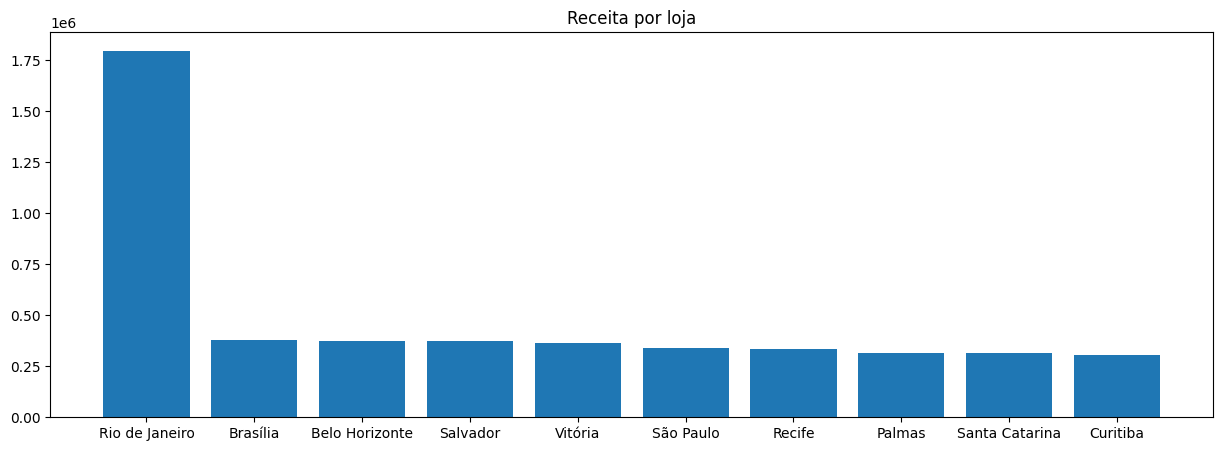

In [98]:
plt.figure(figsize=(15,5))
plt.bar(receita_loja.index, receita_loja.values)
plt.title('Receita por loja')
plt.show()

In [99]:
# A maior receita é de 1797906
receita_loja.max()

1797906.9768

In [100]:
# A receita média das demais lojas é de 344624
receita_loja[receita_loja!=receita_loja.max()].mean()

344624.4032888889

In [101]:
# Aqui mostra que a maior receita é 5 vezes maior que a média de receita das demais lojas
receita_loja.max()/receita_loja[receita_loja!=receita_loja.max()].mean()

5.217004250545965

## Receita por produto

In [102]:
receita_produto = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
receita_produto

,produto_valor
produto_produto,
laptop básico,3.208500e+06
laptop gamer,9.540000e+05
monitor,2.805000e+05
mesa,1.470600e+05
impressora,1.337000e+05
cadeira,8.316000e+04
xxx-231a,5.844661e+04
carregador,2.460000e+04
teclado,6.120000e+03


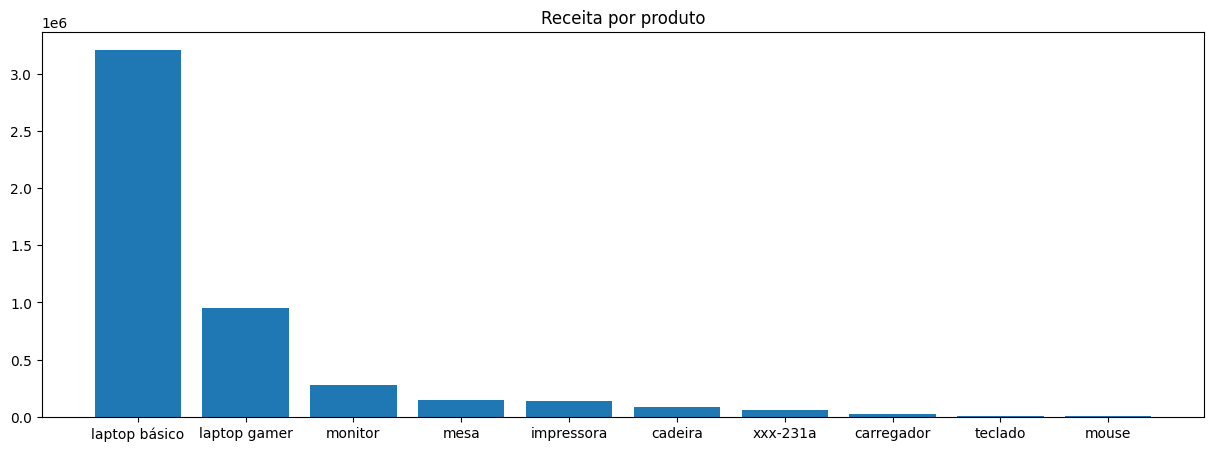

In [103]:
plt.figure(figsize=(15,5))
plt.bar(receita_produto.index, receita_produto.values)
plt.title('Receita por produto')
plt.show()

In [104]:
# Receita que o produto laptop básico gera
receita_produto.max()

3208500.0

In [105]:
# O produto que mais gera receita, gera 17 vezes a média dos demais produtos
receita_produto.max()/receita_produto[receita_produto!=receita_produto.max()].mean()

17.07631322340618

In [106]:
# Os demais produtos geram uma média de 187891 de receita
receita_produto[receita_produto!=receita_produto.max()].mean()

187891.84515555555

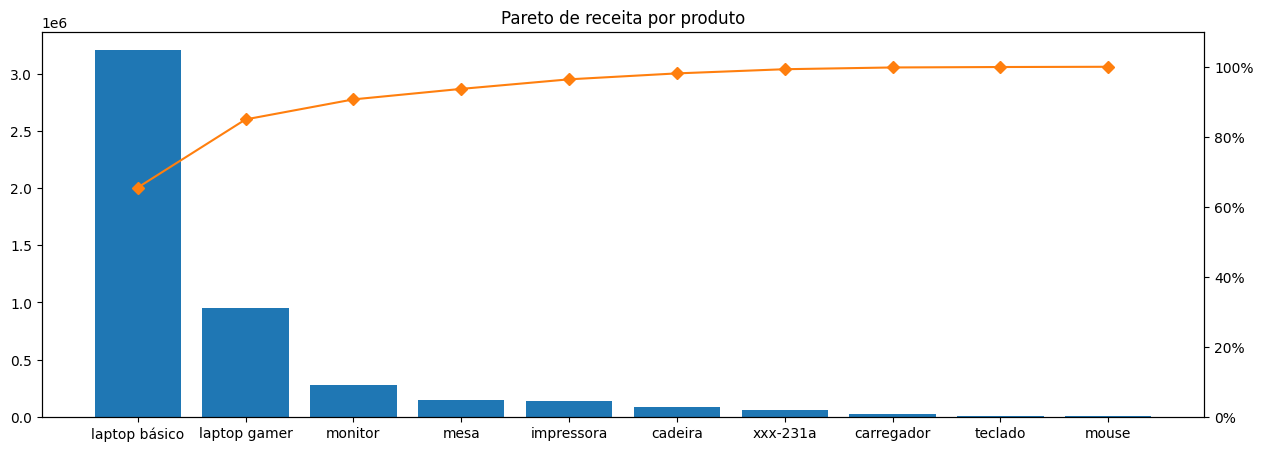

In [107]:
# No pareto é mostardo que o laptop básico representa 70% da receita de venda, o laptop básico + laptop gamer representam juntos quase 90% da receita
# e os outros produtos representam o restante da receita
from matplotlib.ticker import PercentFormatter

pareto = df[['produto_produto','produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(pareto.index, pareto.values, color='C0')
ax2 = ax.twinx()
ax2.plot(pareto.index, pareto.values.cumsum()/pareto.values.sum()*100, color='C1', marker='D')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.ylim(0,110)
plt.title('Pareto de receita por produto')
plt.show()

## Subplots

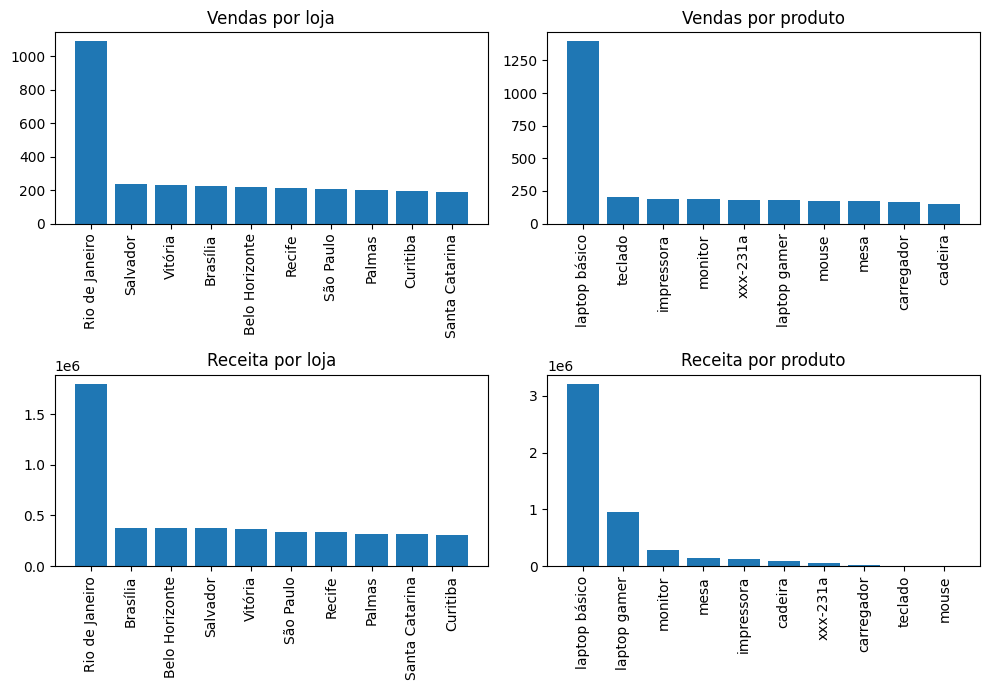

In [108]:
plt.figure(figsize=(10,7))

# Gráfico de vendas por loja (cidade)
plt.subplot(2,2,1)
venda_loja = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(venda_loja.index, venda_loja.values)
plt.title('Vendas por loja')
plt.xticks(rotation=90)

# Gráfico de vendas por produto
plt.subplot(2,2,2)
venda_produto = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.bar(venda_produto.index, venda_produto.values)
plt.title('Vendas por produto')
plt.xticks(rotation=90)

# Gráfico de receita por loja
plt.subplot(2,2,3)
receita_loja = df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending=False)
plt.bar(receita_loja.index, receita_loja.values)
plt.title('Receita por loja')
plt.xticks(rotation=90)

# Gráfico de receita por produto
plt.subplot(2,2,4)
receita_produto = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
plt.bar(receita_produto.index, receita_produto.values)
plt.title('Receita por produto')
plt.xticks(rotation=90)

# Ajuste do layout do gráfico
plt.tight_layout()

## Receita combinando produto-loja

In [109]:
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,venda_ano
id,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74,2018
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52,2018
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,62,2018
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82,2018
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83,2018


In [110]:
# Receita total de cada produto por loja
receita_produto_loja = df.groupby(['loja_cidade', 'produto_produto'])['produto_valor'].sum().unstack()
receita_produto_loja

produto_produto,cadeira,carregador,impressora,laptop básico,laptop gamer,mesa,monitor,mouse,teclado,xxx-231a
loja_cidade,,,,,,,,,,
Belo Horizonte,6480.0,1800.0,11200.0,232300.0,84800.0,9460.0,25500.0,200.0,450.0,3532.4872
Brasília,6480.0,1350.0,9800.0,250700.0,79500.0,12040.0,13500.0,220.0,540.0,3853.6224
Curitiba,4320.0,1500.0,6300.0,227700.0,37100.0,9460.0,10500.0,280.0,300.0,5780.4336
Palmas,7020.0,1650.0,14000.0,179400.0,79500.0,10320.0,19500.0,240.0,390.0,4817.0280
Recife,8100.0,1650.0,9800.0,195500.0,79500.0,11180.0,22500.0,180.0,660.0,3853.6224
Rio de Janeiro,30240.0,8700.0,50400.0,1189100.0,344500.0,56760.0,96000.0,1280.0,1980.0,18946.9768
Salvador,4320.0,2250.0,9100.0,264500.0,53000.0,13760.0,22500.0,220.0,450.0,5138.1632
Santa Catarina,4320.0,2100.0,7700.0,204700.0,63600.0,6020.0,21000.0,200.0,480.0,3211.3520
São Paulo,6480.0,1500.0,7000.0,223100.0,63600.0,6020.0,30000.0,300.0,510.0,2247.9464


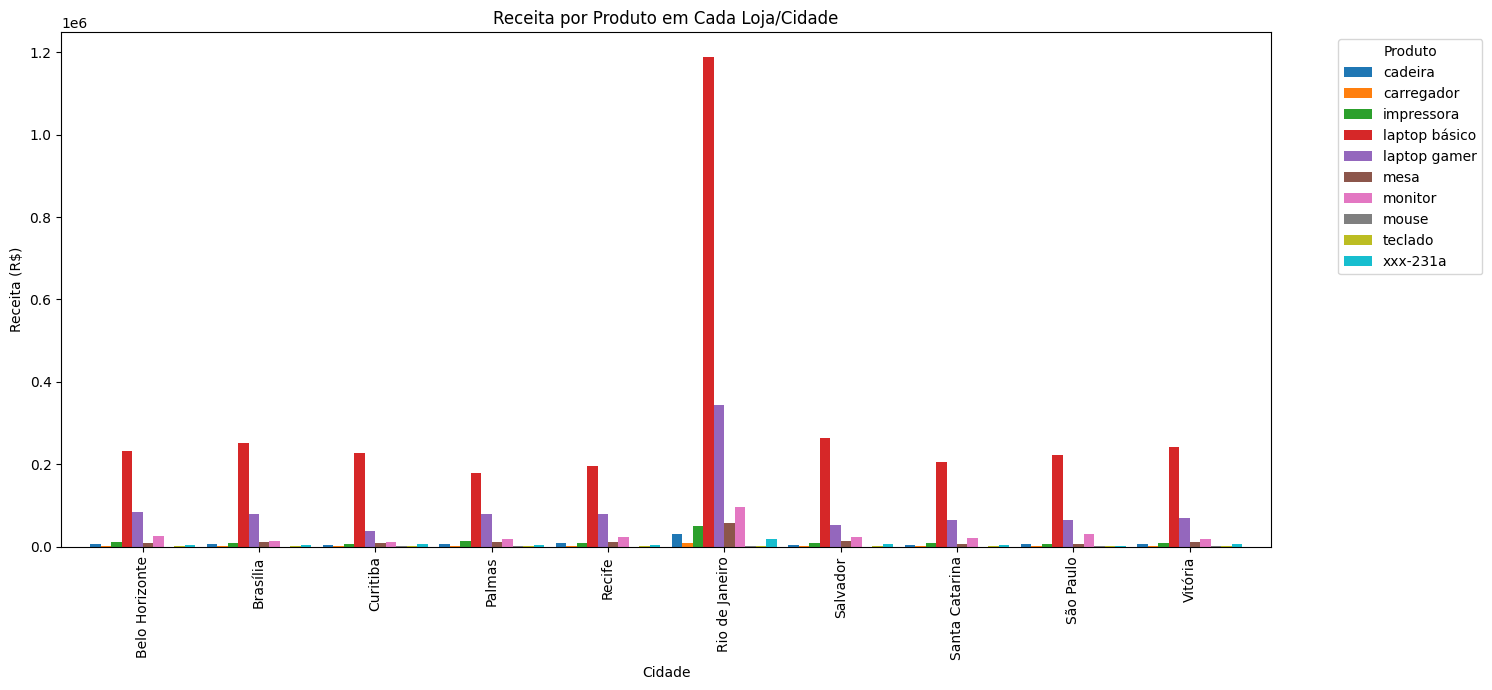

In [111]:
# Gráfico de barras agrupadas
receita_produto_loja.plot(kind='bar', figsize=(15,7), width=0.9)

# Título e rótulos dos eixos
plt.title('Receita por Produto em Cada Loja/Cidade')
plt.xlabel('Cidade')
plt.ylabel('Receita (R$)')

# Exibir a legenda
plt.legend(title='Produto', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Análise de Clientes

## Receita por cliente

In [112]:
receita_cliente = df[['cliente_nome', 'produto_valor']].groupby('cliente_nome').sum().produto_valor.sort_values(ascending=False)
receita_cliente

,produto_valor
cliente_nome,
Leila Costa,28970.0000
Melissa Lima,25892.2704
Lavinia Carvalho,25261.1352
Fernanda Pinto,24660.0000
Felipe Castro,22920.0000
...,...
José Pinto,20.0000
Thaís Pinto,20.0000
Enzo Lima,20.0000


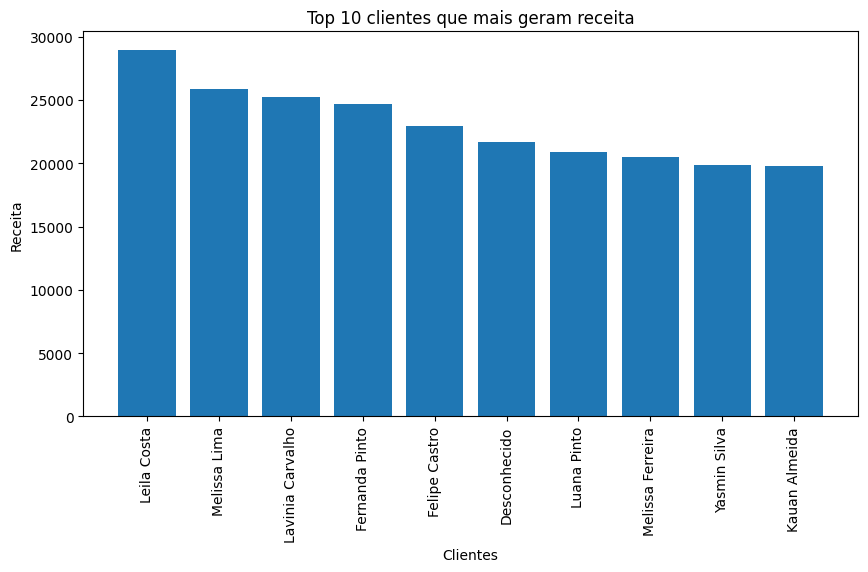

In [113]:
# Ordena a receita dos clientes em ordem decrescente e seleciona os 10 primeiros
top_10_clientes = receita_cliente.sort_values(ascending=False).head(10)

# Plota o gráfico com os 10 clientes que mais geram receita
plt.figure(figsize=(10,5))
plt.bar(top_10_clientes.index, top_10_clientes.values)
plt.title('Top 10 clientes que mais geram receita')
plt.xlabel('Clientes')
plt.ylabel('Receita')
plt.xticks(rotation=90)
plt.show()

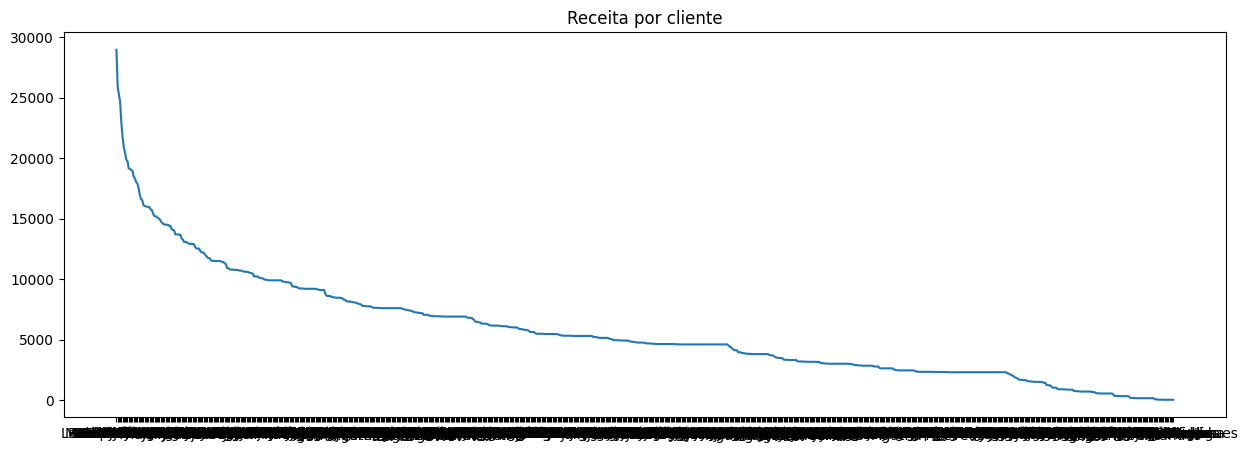

In [114]:
plt.figure(figsize=(15,5))
plt.plot(receita_cliente.index, receita_cliente.values)
plt.title('Receita por cliente')
plt.show()

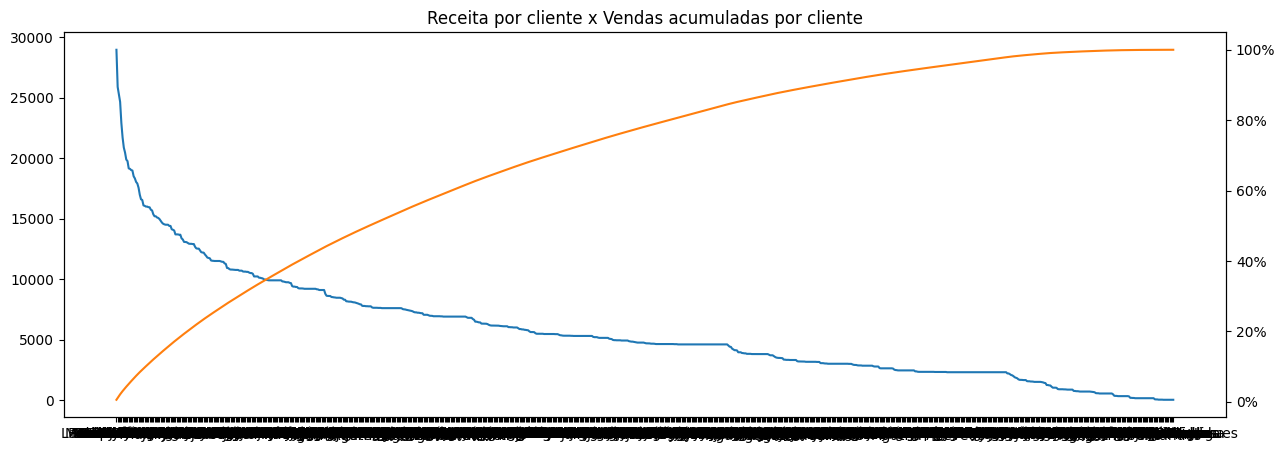

In [115]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(receita_cliente.index, receita_cliente.values, color='C0')
ax2 = ax.twinx()
ax2.plot(receita_cliente.index, receita_cliente.values.cumsum()/receita_cliente.values.sum()*100, color='C1')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.title('Receita por cliente x Vendas acumuladas por cliente')
plt.show()

# Retira um pouco da poluição visual do gráfico
ax2.axes.get_xaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)

In [116]:
# soma de receita acumulada por cliente até chegar a 100%
receita_cliente.cumsum()/receita_cliente.sum()

,produto_valor
cliente_nome,
Leila Costa,0.005913
Melissa Lima,0.011197
Lavinia Carvalho,0.016353
Fernanda Pinto,0.021386
Felipe Castro,0.026064
...,...
José Pinto,0.999984
Thaís Pinto,0.999988
Enzo Lima,0.999992


In [117]:
# Receita acumulada por cliente até chegar a 60%
receita_acumulada = receita_cliente.cumsum()/receita_cliente.sum()
receita_acumulada[receita_acumulada<0.60]

,produto_valor
cliente_nome,
Leila Costa,0.005913
Melissa Lima,0.011197
Lavinia Carvalho,0.016353
Fernanda Pinto,0.021386
Felipe Castro,0.026064
...,...
Ágatha Cavalcanti,0.593654
Matilde Gomes,0.595062
Melissa Araujo,0.596470


In [118]:
# Quantidade de clientes da empresa que geram a receita de até 60%
receita_acumulada = receita_cliente.cumsum()/receita_cliente.sum()
receita_acumulada[receita_acumulada<0.60].count()

273

In [119]:
# 32% dos clientes representam 60% da recita da empresa
receita_acumulada[receita_acumulada<0.60].count()/receita_acumulada.count()

0.3170731707317073

In [120]:
# Ordenar a receita dos clientes em ordem decrescente
receita_ordenada = receita_cliente.sort_values(ascending=False)

# Calcular a receita acumulada em porcentagem
receita_acumulada = receita_ordenada.cumsum() / receita_ordenada.sum()

# Selecionar os 32% dos clientes que mais geram receita
clientes_32 = receita_acumulada[receita_acumulada <= 0.32]

# Transformar em DataFrame
clientes_32_df = pd.DataFrame({'Cliente': clientes_32.index, 'Receita Acumulada': clientes_32.values})

# Exibir o DataFrame que contem os 32% de clientes que geram 60% da receita da empresa
# (Esse DataFrame com os dados dos clientes que geram 60% da receita da empresa, pode ser útil para a equipe de marketing ou vendas)
clientes_32_df

,Cliente,Receita Acumulada
0,Leila Costa,0.005913
1,Melissa Lima,0.011197
2,Lavinia Carvalho,0.016353
3,Fernanda Pinto,0.021386
4,Felipe Castro,0.026064
...,...,...
104,Vitoria Castro,0.310114
105,Leonardo Sousa,0.312282
106,Gabriela Cavalcanti,0.314445
107,Emilly Martins,0.316609


## Clientes que mais compraram

**Clientes que fizeram mais compras**

In [121]:
compras = df.groupby('cliente_nome').count().produto_valor.sort_values(ascending=False)
compras.head(10)

,produto_valor
cliente_nome,
Leila Costa,16
Fernanda Pinto,12
Melissa Ferreira,11
Luana Costa,11
Enzo Goncalves,11
Felipe Castro,10
Julieta Fernandes,10
Lavinia Carvalho,10
Gustavo Almeida,10


**Clientes que mais gastaram**

In [122]:
gastos = df.groupby('cliente_nome')['produto_valor'].sum().sort_values(ascending=False)
gastos.head(10)

,produto_valor
cliente_nome,
Leila Costa,28970.0000
Melissa Lima,25892.2704
Lavinia Carvalho,25261.1352
Fernanda Pinto,24660.0000
Felipe Castro,22920.0000
Desconhecido,21721.1352
Luana Pinto,20881.1352
Melissa Ferreira,20470.0000
Yasmin Silva,19890.0000


## Clientes por gênero

**Quantidade de clientes**

In [123]:
# .nunique seleciona os ids ou números únicas na coluna, no caso aqui, foi usado na coluna id_clientes
Totalclientes = df.id_cliente.nunique()
Totalclientes

958

**Gênero dos clientes**

In [124]:
quantidade_genero = df.groupby('cliente_sexo').id_cliente.nunique()
quantidade_genero

,id_cliente
cliente_sexo,
F,480
M,478


In [125]:
porcentagem_genero = quantidade_genero/Totalclientes*100
porcentagem_genero

,id_cliente
cliente_sexo,
F,50.104384
M,49.895616


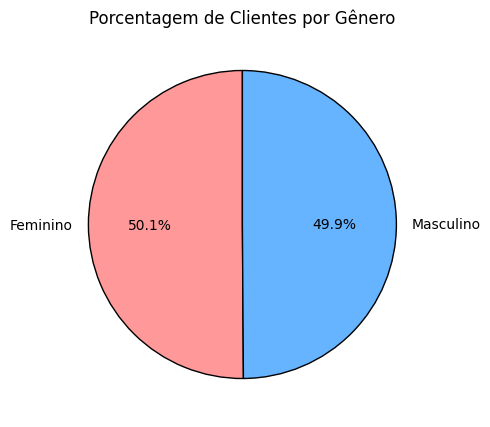

In [126]:
# Dados da porcentagem por gênero
labels = ['Feminino', 'Masculino']  # Labels para o gráfico de pizza
# Valores de porcentagem
sizes = [50.104384, 49.895616]
# Cores do gráfico
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Porcentagem de Clientes por Gênero')
plt.show()

## Vendas por gênero

**Receita total**

In [127]:
receita_total = df['produto_valor'].sum()
receita_total

4899526.6064

**Receita por gênero**

In [128]:
receita_genero = df.groupby('cliente_sexo')['produto_valor'].sum()
receita_genero

,produto_valor
cliente_sexo,
F,2.436436e+06
M,2.463090e+06


In [129]:
porcentagem_receita_genero = receita_genero/receita_total*100
porcentagem_receita_genero

,produto_valor
cliente_sexo,
F,49.727998
M,50.272002


**Compras por gênero**

In [130]:
total_compras_genero = (df.groupby('cliente_sexo')['produto_valor'].count())
total_compras_genero

,produto_valor
cliente_sexo,
F,1487
M,1513


**Média de preço dos produtos por gênero**

In [131]:
media_preco_genero = df.groupby('cliente_sexo')['produto_valor'].mean()
media_preco_genero

,produto_valor
cliente_sexo,
F,1638.491252
M,1627.951166


**Produtos mais comprados por gênero**

In [132]:
# df.groupby(['cliente_sexo', 'produto_produto']).size()
df.groupby(['cliente_sexo', 'produto_produto']).size().reset_index(name='quantidade')

,cliente_sexo,produto_produto,quantidade
0,F,cadeira,79
1,F,carregador,81
2,F,impressora,93
3,F,laptop básico,688
4,F,laptop gamer,91
5,F,mesa,97
6,F,monitor,91
7,F,mouse,85
8,F,teclado,97
9,F,xxx-231a,85


# Análise de tempo

## Tempo médio de pagamento

In [133]:
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,venda_ano
id,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74,2018
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52,2018
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,62,2018
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82,2018
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83,2018


In [134]:
# Média em dias de pagamento
df.tempo_pg.mean()

22.47200772200772

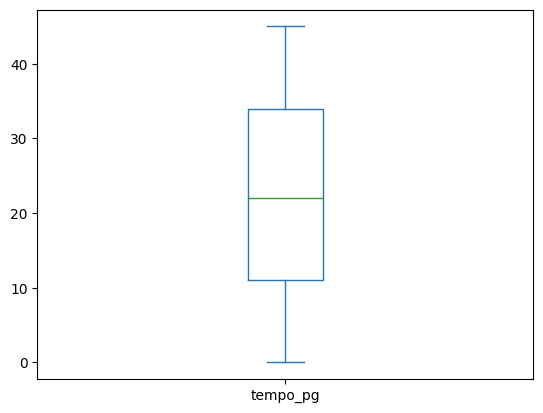

In [135]:
# Verificar se há outliers no tempo de pagamento
df.tempo_pg.plot.box()
plt.show()

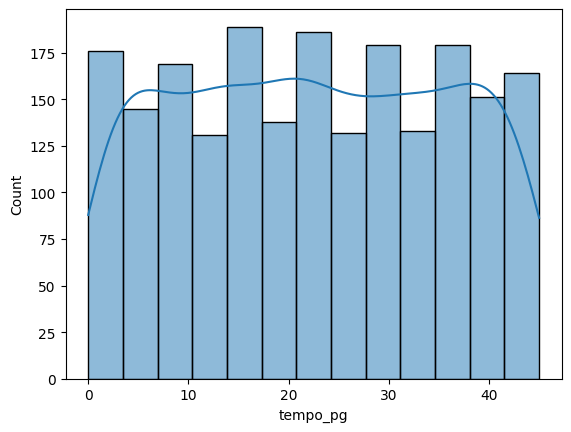

In [136]:
# Curva de distribuição de tempo_pg
sns.histplot(data=df.tempo_pg, kde=True)
plt.show()

# O gráfico a seguir não segue uma distribuição normal, o que significa que não há uma previsibilidade de pagamento
# Uma distribuição normal possui um valor central que representa a maior frequência de dados, e ao distancir-se do centro, os dados adquirem menor frequência

In [137]:
# Os dados a seguir mostram que a previsão de pagamento pode variar de 0 a 45 dias
df.tempo_pg.describe()

,tempo_pg
count,2072.000000
mean,22.472008
std,13.256384
min,0.000000
25%,11.000000
50%,22.000000
75%,34.000000
max,45.000000


## Tempo de pagamento por cidade e produto

In [138]:
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,venda_ano
id,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74,2018
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52,2018
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,62,2018
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82,2018
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83,2018


**Tempo de pagamento por cidade**

In [139]:
# Média de tempo de pagamento por cidade
df.groupby('loja_cidade').tempo_pg.mean()

,tempo_pg
loja_cidade,
Belo Horizonte,21.430939
Brasília,22.269430
Curitiba,23.550898
Palmas,23.294444
Recife,22.301075
Rio de Janeiro,23.363855
Salvador,21.644860
Santa Catarina,19.769231
São Paulo,23.087432


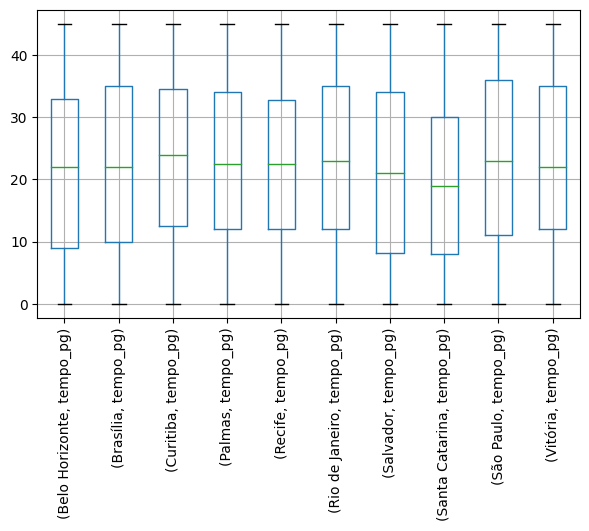

In [140]:
# Conferindo se há outliers no tempo de pagamento por cidade através do boxplot
plt.figure(figsize=(7,4))
df[['loja_cidade','tempo_pg']].groupby('loja_cidade').boxplot('tempo_pg')
plt.xticks(rotation=90)
plt.show()

**Tempo de pagamento por produto**

In [141]:
df.groupby('produto_produto').tempo_pg.mean()

,tempo_pg
produto_produto,
cadeira,23.734513
carregador,22.051724
impressora,21.383459
laptop básico,22.980513
laptop gamer,21.763889
mesa,20.300885
monitor,22.021277
mouse,22.912698
teclado,22.104575


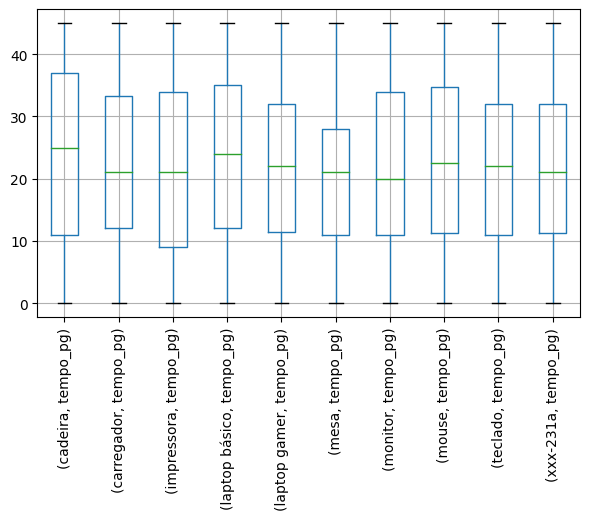

In [142]:
# Conferindo se há outliers no tempo de pagamento por produto através do boxplot
plt.figure(figsize=(7,4))
df[['produto_produto','tempo_pg']].groupby('produto_produto').boxplot('tempo_pg')
plt.xticks(rotation=90)
plt.show()

## Tempo médio de pagamento por promoção

**Aqui nessa altura da análise recebemos novos dados de vendas, no caso os dados dessas vendas recebidas foram feitas vom promoção**

In [143]:
# Lendo os dados recebidos em csv
dfPromo = pd.read_csv('/content/drive/MyDrive/trabalhos/python/lojas_informatica/dados/caso_estudo_venda_promocao.csv', sep=';')

In [144]:
# Visualizar
dfPromo.head()

,id_venda,promoção
0,1,0
1,2,1
2,3,1
3,4,0
4,5,0


In [145]:
# Definir o id_venda como index para os dados recebidos
dfPromo = dfPromo.set_index('id_venda')
dfPromo

,promoção
id_venda,
1,0
2,1
3,1
4,0
5,0
...,...
2996,0
2997,0
2998,0


In [146]:
#join entre df e dfPromo
df = df.join(dfPromo)
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,venda_ano,promoção
id,,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74,2018,0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52,2018,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,62,2018,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82,2018,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83,2018,0


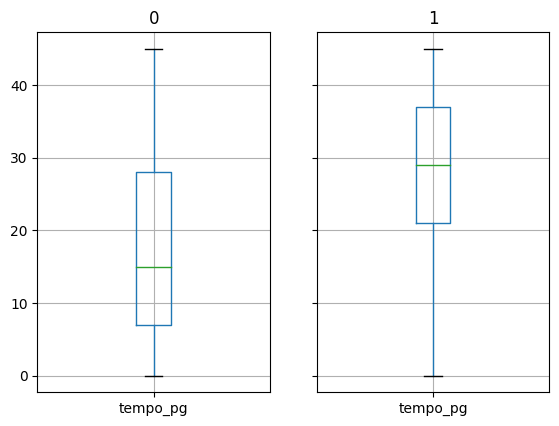

In [147]:
# Utilizar o boxplot para conferir se há problemas ou discrepância no tempo médio de pagamento sem promoção, e com promoção
graf_dados = df[['promoção','tempo_pg']][~df.tempo_pg.isnull()]
graf_dados.groupby('promoção').boxplot(column=['tempo_pg'])
plt.show()

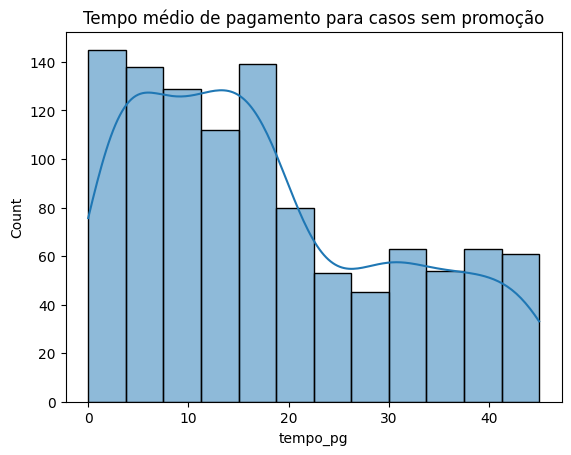

In [148]:
# O histoplot mostra que quando a venda não é de promoção, há uma chanche maior do pagamento ocorrer até 20 dias
sns.histplot(data=graf_dados.tempo_pg[graf_dados['promoção']==0], kde=True)
plt.title('Tempo médio de pagamento para casos sem promoção')
plt.show()

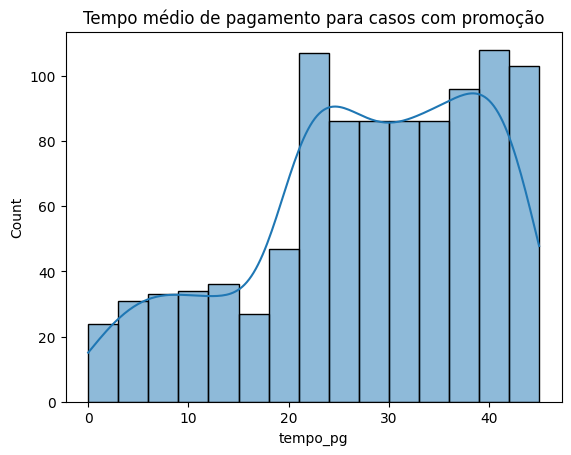

In [149]:
# Aqui o histloplot mostra que quando a venda é feita com promoção, há uma chanche maior do pagamento ocorrer após 20 dias
sns.histplot(data=graf_dados.tempo_pg[graf_dados['promoção']==1], kde=True)
plt.title('Tempo médio de pagamento para casos com promoção')
plt.show()

# Análise de inadimplência

## Inadimplência por loja

In [150]:
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,venda_ano,promoção
id,,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74,2018,0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52,2018,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,62,2018,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82,2018,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83,2018,0


In [151]:
# Apenas 69% das vendas de todas lojas geram pagamentos
df.pg.mean()

0.6906666666666667

**Lojas que mais geram inadimplência**

In [152]:
# O código abaixo mostra as vendas em que não houve pagamento
# df[df.pg==0]

# Inadimplência por loja
df[df.pg==0].groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)

,produto_valor
loja_cidade,
Rio de Janeiro,672
Belo Horizonte,40
Santa Catarina,35
Vitória,34
Brasília,30
Curitiba,26
Recife,25
São Paulo,24
Palmas,22


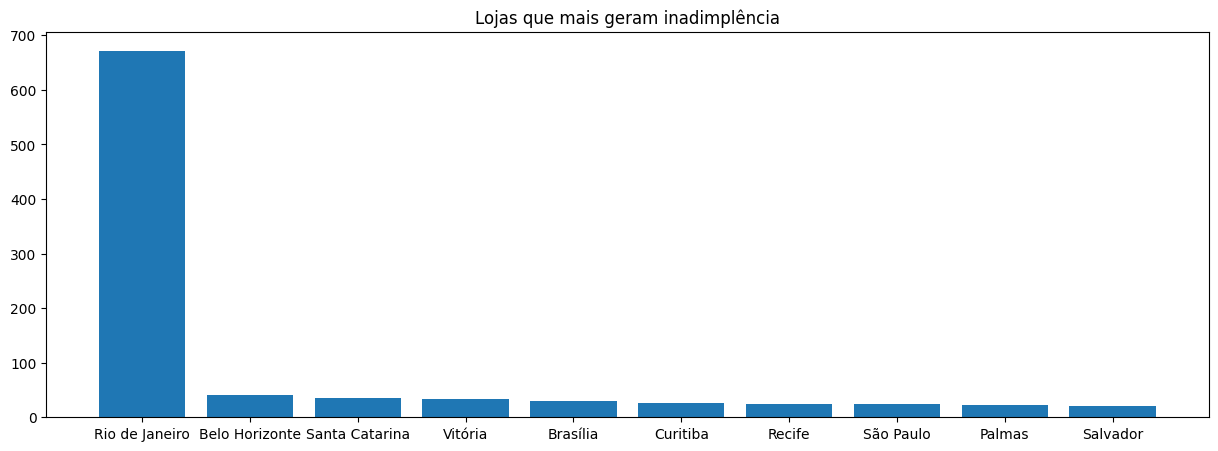

In [153]:
graf_dados = df[df.pg==0].groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Lojas que mais geram inadimplência')
plt.show()

**Porcentagem de pagamentos por loja**

In [154]:
df.groupby('loja_cidade').pg.mean().sort_values(ascending=False)

,pg
loja_cidade,
Salvador,0.914530
Palmas,0.891089
São Paulo,0.884058
Recife,0.881517
Brasília,0.865471
Curitiba,0.865285
Vitória,0.852814
Belo Horizonte,0.819005
Santa Catarina,0.816754


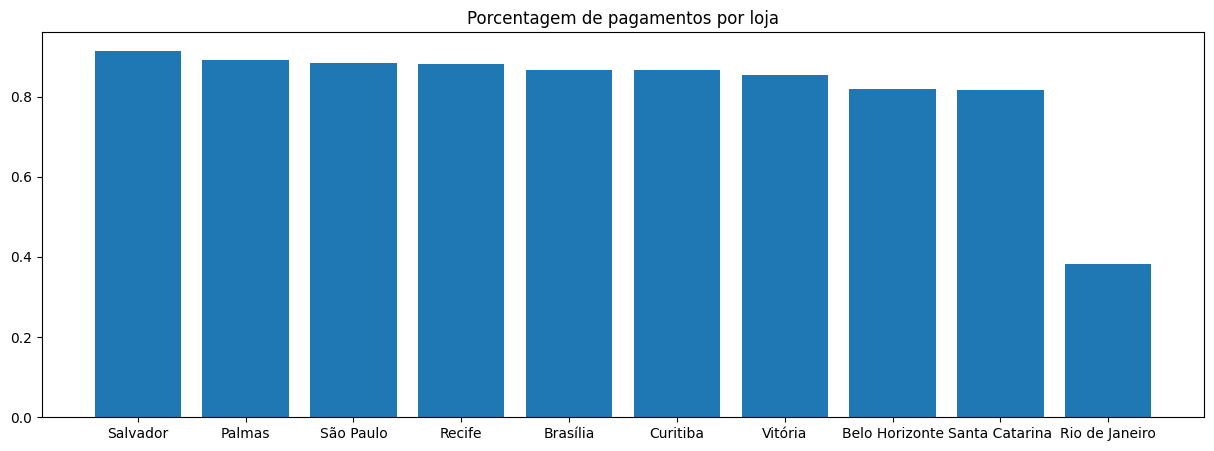

In [155]:
graf_dados = df.groupby('loja_cidade').pg.mean().sort_values(ascending=False)
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Porcentagem de pagamentos por loja')
plt.show()

**Resumo gráfico**

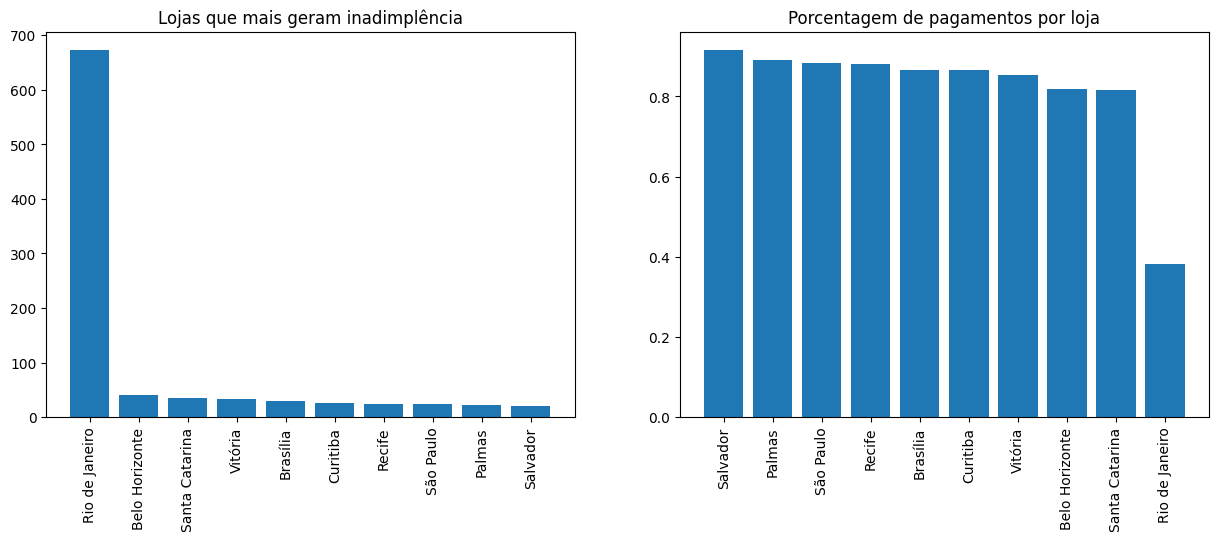

In [156]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
graf_dados = df[df.pg==0].groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Lojas que mais geram inadimplência')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
graf_dados = df.groupby('loja_cidade').pg.mean().sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Porcentagem de pagamentos por loja')
plt.xticks(rotation=90)

plt.show()

## Inadimplência por produto

In [157]:
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,venda_ano,promoção
id,,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74,2018,0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52,2018,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,62,2018,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82,2018,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83,2018,0


**Produtos que mais geram inadimplência**

In [158]:
# Inadimplência por produto
df[df.pg==0].groupby('produto_produto').count().produto_valor.sort_values(ascending=False)

,produto_valor
produto_produto,
laptop básico,420
laptop gamer,108
impressora,58
mesa,58
xxx-231a,52
teclado,51
carregador,48
monitor,46
mouse,46


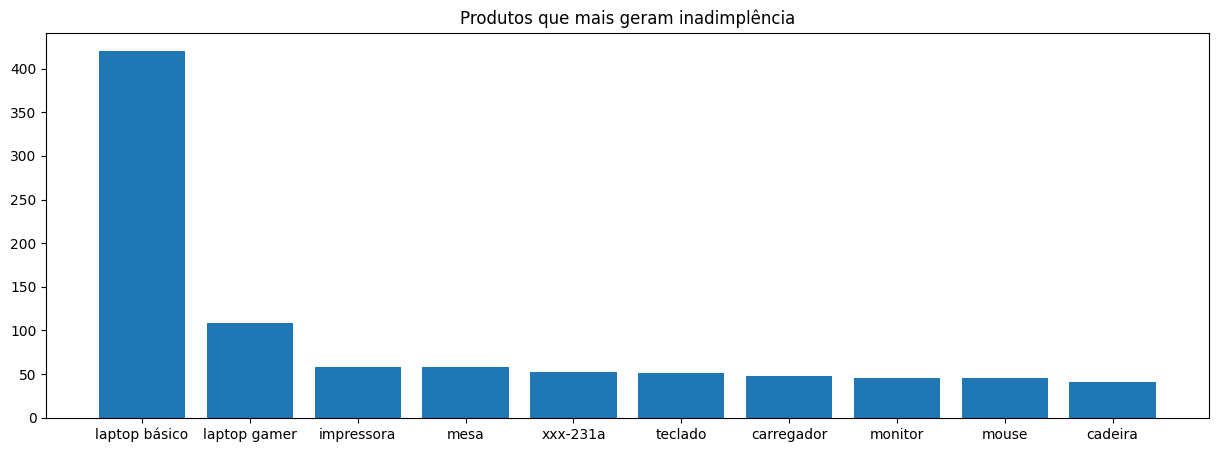

In [159]:
graf_dados = df[df.pg==0].groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Produtos que mais geram inadimplência')
plt.show()

**Porcentagem de pagamento por produto**

In [160]:
df.groupby('produto_produto').pg.mean().sort_values(ascending=False)

,pg
produto_produto,
monitor,0.754011
teclado,0.750000
cadeira,0.733766
mouse,0.732558
xxx-231a,0.714286
carregador,0.707317
laptop básico,0.698925
impressora,0.696335
mesa,0.660819


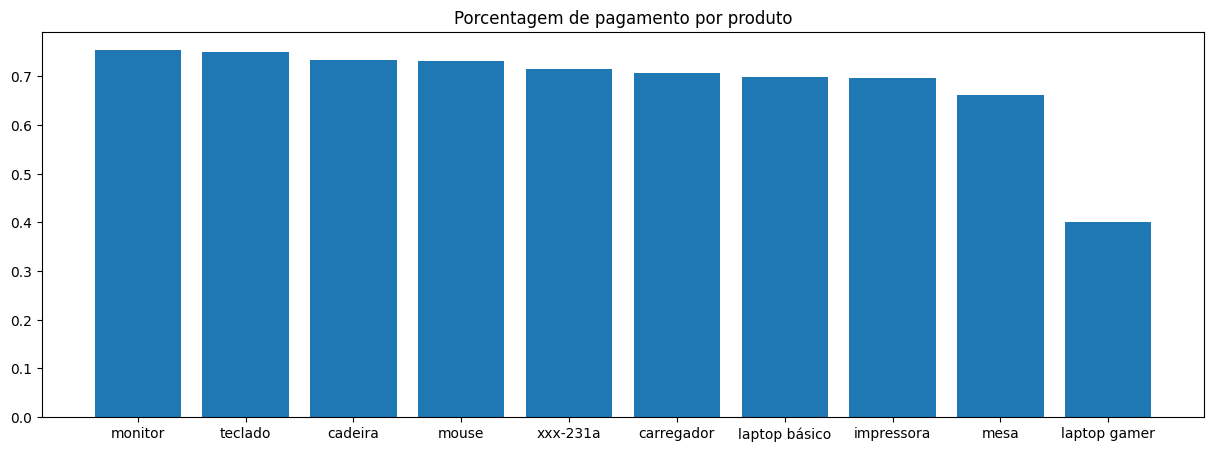

In [161]:
graf_dados = df.groupby('produto_produto').pg.mean().sort_values(ascending=False)
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Porcentagem de pagamento por produto')
plt.show()

**Resumo gráfico**

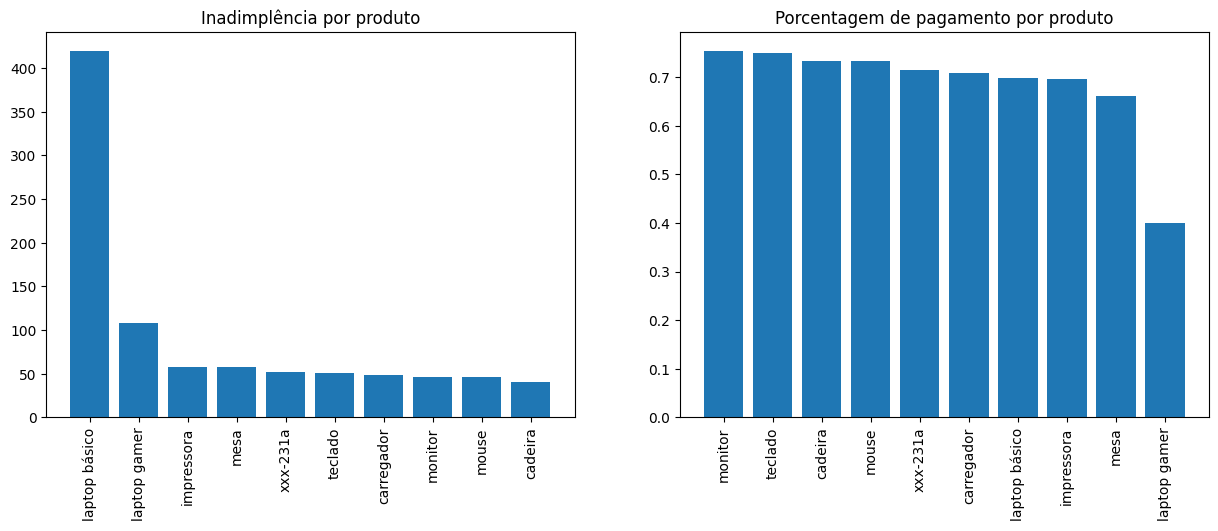

In [162]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
graf_dados = df[df.pg==0].groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Inadimplência por produto')

plt.subplot(1,2,2)
graf_dados = df.groupby('produto_produto').pg.mean().sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Porcentagem de pagamento por produto')

plt.show()

## Inadimplência por idade

In [163]:
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,venda_ano,promoção
id,,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74,2018,0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52,2018,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,62,2018,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82,2018,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83,2018,0


In [164]:
# O código abaixo mostra a porcentagem de pagamentos por idade
df[['cliente_idade', 'pg']].groupby('cliente_idade').mean().sort_values('cliente_idade')

,pg
cliente_idade,
0,0.200000
20,0.800000
21,0.653846
22,0.717949
23,0.761905
...,...
85,0.533333
86,0.655172
87,0.631579


<Axes: xlabel='cliente_idade'>

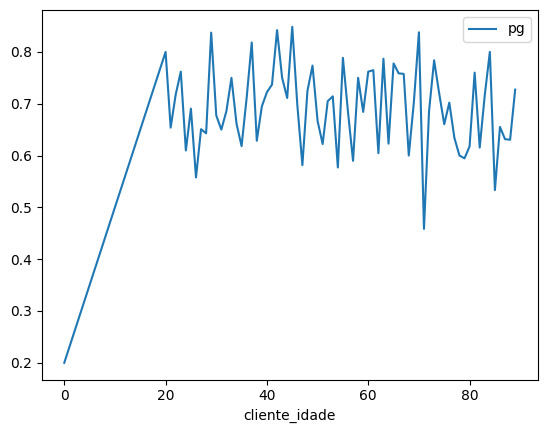

In [165]:
# O gráfico abaixo também mostra a porcentagem de pagamentos por idade
graf_dados = df[['cliente_idade', 'pg']].groupby('cliente_idade').mean().sort_values('cliente_idade')
graf_dados.plot()

In [166]:
# Procurar clientes com idade menor que 20 anos que não realizaram o pagamento pela compra
df[df.cliente_idade<20]

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,venda_ano,promoção
id,,,,,,,,,,,,,,,,
21,270,2,10,2018-01-12,Desconhecido,M,2024-01-01,Rio de Janeiro,xxx-231a,321.1352,NaT,0,NaN,0,2018,0
1059,269,5,4,2018-12-15,Desconhecido,F,2024-01-01,Santa Catarina,laptop gamer,5300.0000,NaT,0,NaN,0,2018,0
1745,269,9,3,2019-08-03,Desconhecido,F,2024-01-01,Palmas,laptop básico,2300.0000,2019-09-03,1,31.0,0,2019,1
1900,269,2,3,2019-09-22,Desconhecido,F,2024-01-01,Rio de Janeiro,laptop básico,2300.0000,NaT,0,NaN,0,2019,0
2370,277,10,3,2020-03-09,Brenda Santos,F,2024-01-01,Vitória,laptop básico,2300.0000,NaT,0,NaN,0,2020,0


**A partir dos dados acima, é possível concluir que clientes que não possuem os dados completos, podem ter um potencial maior de não realizarem o pagamento por uma compra.**

## Mapa de Calor de inadimplência

In [167]:
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,venda_ano,promoção
id,,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74,2018,0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52,2018,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,62,2018,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82,2018,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83,2018,0


**Mapa de calor de inadimplência com relação a produto x loja**

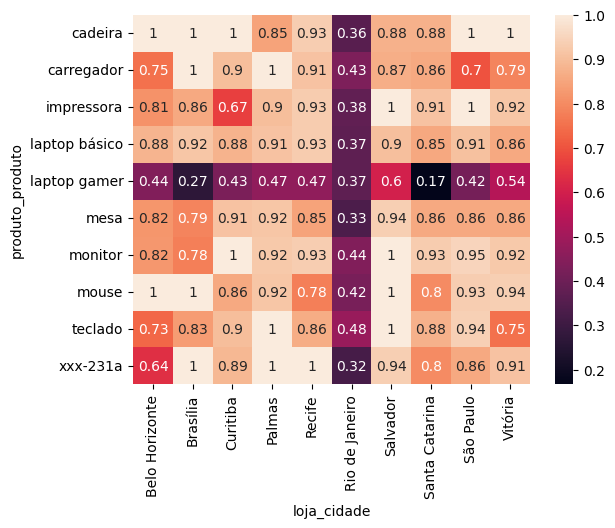

In [168]:
# Quanto mais escura a área do mapa de calor, mais relevente ela é.
# Os números são porcentagem de pagamento com relação a produto e loja (quanto mais escuro, menor é a porcentagem de pagamento)
graf_dados = df.pivot_table(index='produto_produto', columns='loja_cidade', values='pg', aggfunc='mean')
sns.heatmap(graf_dados, annot=True)
plt.show()

**Mapa de calor de inadimplência com relação a produto x idade do cliente**

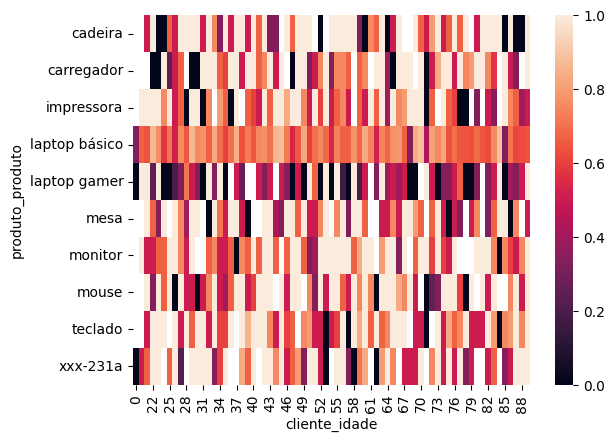

In [169]:
# Este mapa de calor é irrelevante, pois não mostra nenhuma correlação entre produto e idade do cliente
graf_dados = df.pivot_table(index='produto_produto', columns='cliente_idade', values='pg', aggfunc='mean')
sns.heatmap(graf_dados)
plt.show()

**Mapa de calor de inadimplência com relação a loja x idade do cliente**

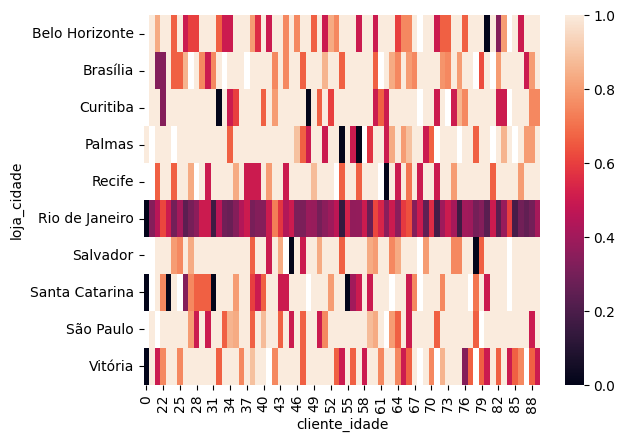

In [170]:
# Este mapa de calor é irrelevante, pois não mostra nenhuma correlação entre loja e idade do cliente
graf_dados = df.pivot_table(index='loja_cidade', columns='cliente_idade', values='pg', aggfunc='mean')
sns.heatmap(graf_dados)
plt.show()

# Conclusão

Foi possível identificar uma queda nas vendas durante os anos de atuação da empresa, junto a isso também foi detectada uma queda significativa nas receitas devido a alta inadimplência nos pagamentos referentes as compras efetuadas, com base nisso recomenda-se implantar um modelo de classificação que indicará se o cliente em questão será inadimplente ou não.

# Salvando (exportando) o dataframe tratado

In [171]:
df.head()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,venda_ano,promoção
id,,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74,2018,0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52,2018,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,62,2018,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82,2018,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83,2018,0


In [172]:
# Criação dos dataframes apenas com as colunas que serão relevantes para o modelo de Machine Learning
dfModelo = df[['cliente_sexo','cliente_idade','loja_cidade','produto_produto','produto_valor','promoção','pg']]

In [173]:
# Renomear a coluna promoção para promocao
dfModelo = dfModelo.rename(columns={'promoção':'promocao'})

In [174]:
# O código abaixo faz a substituição de espaço e - para _ nos dados, dessa forma evita que haja algum problema no modelo
dfModelo = dfModelo.replace([' ','-'],'_', regex=True)

In [175]:
dfModelo.head()

,cliente_sexo,cliente_idade,loja_cidade,produto_produto,produto_valor,promocao,pg
id,,,,,,,
1,M,74,Palmas,laptop_básico,2300.0,0,1
2,F,52,Palmas,laptop_básico,2300.0,1,1
3,M,62,Salvador,cadeira,540.0,1,1
4,M,82,Belo_Horizonte,laptop_básico,2300.0,0,0
5,M,83,Palmas,mouse,20.0,0,1


In [176]:
dfModelo.to_csv('dados_tratados.csv', sep=';', encoding='utf-8', index = False)